### Exploratory Data Analysis - Flight Delays

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
%matplotlib inline

In [2]:
df = pd.read_csv('./delay_april2018.csv')

#### Intro to data

In [3]:
df.head(10)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TOTAL_ADD_GTIME,Unnamed: 30
0,2018,2,4,4,3,2018-04-04,YV,12339,1233904,32337,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,2,4,4,3,2018-04-04,YV,12953,1295304,31703,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,2,4,25,3,2018-04-25,YV,12264,1226402,30852,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,2,4,3,2,2018-04-03,YV,12264,1226402,30852,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,2,4,3,2,2018-04-03,YV,11066,1106606,31066,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,2,4,28,6,2018-04-28,YV,12264,1226402,30852,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,2,4,28,6,2018-04-28,YV,14492,1449202,34492,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,2,4,25,3,2018-04-25,YV,12953,1295304,31703,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018,2,4,20,5,2018-04-20,YV,11540,1154005,30615,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,2,4,15,7,2018-04-15,YV,13487,1348702,31650,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596046 entries, 0 to 596045
Data columns (total 31 columns):
YEAR                     596046 non-null int64
QUARTER                  596046 non-null int64
MONTH                    596046 non-null int64
DAY_OF_MONTH             596046 non-null int64
DAY_OF_WEEK              596046 non-null int64
FL_DATE                  596046 non-null object
CARRIER                  596046 non-null object
ORIGIN_AIRPORT_ID        596046 non-null int64
ORIGIN_AIRPORT_SEQ_ID    596046 non-null int64
ORIGIN_CITY_MARKET_ID    596046 non-null int64
ORIGIN                   596046 non-null object
DEST_AIRPORT_ID          596046 non-null int64
DEST_AIRPORT_SEQ_ID      596046 non-null int64
DEST_CITY_MARKET_ID      596046 non-null int64
DEST                     596046 non-null object
DEP_DELAY                589428 non-null float64
DEP_DEL15                589428 non-null float64
DEP_DELAY_GROUP          589428 non-null float64
TAXI_OUT                 589859 n

In [5]:
df.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,...,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TOTAL_ADD_GTIME,Unnamed: 30
count,596046.0,596046.0,596046.0,596046.000000,596046.000000,596046.000000,5.960460e+05,596046.000000,596046.000000,5.960460e+05,...,588225.000000,588225.000000,596046.000000,103805.000000,103805.000000,103805.000000,103805.000000,103805.000000,3428.000000,0.0
mean,2018.0,2.0,4.0,15.476180,3.936414,12648.308010,1.264835e+06,31743.906100,12648.124593,1.264816e+06,...,0.176472,-0.267263,0.010489,18.983392,2.659564,15.687221,0.064698,24.711892,34.331097,NaN
std,0.0,0.0,0.0,8.658658,2.077135,1518.563218,1.518561e+05,1293.192527,1518.605560,1.518603e+05,...,0.381221,2.215338,0.101878,55.592277,26.444639,35.031480,1.719831,46.882883,27.111767,NaN
min,2018.0,2.0,4.0,1.000000,1.000000,10135.000000,1.013505e+06,30070.000000,10135.000000,1.013505e+06,...,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,2018.0,2.0,4.0,8.000000,2.000000,11292.000000,1.129202e+06,30721.000000,11292.000000,1.129202e+06,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,NaN
50%,2018.0,2.0,4.0,16.000000,4.000000,12889.000000,1.288903e+06,31453.000000,12889.000000,1.288903e+06,...,0.000000,-1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,3.000000,27.000000,NaN
75%,2018.0,2.0,4.0,23.000000,6.000000,13931.000000,1.393102e+06,32467.000000,13931.000000,1.393102e+06,...,0.000000,0.000000,0.000000,17.000000,0.000000,20.000000,0.000000,30.000000,44.000000,NaN
max,2018.0,2.0,4.0,30.000000,7.000000,16218.000000,1.621801e+06,35991.000000,16218.000000,1.621801e+06,...,1.000000,12.000000,1.000000,1617.000000,1308.000000,1495.000000,153.000000,1179.000000,195.000000,NaN


#### Look at missingness patterns

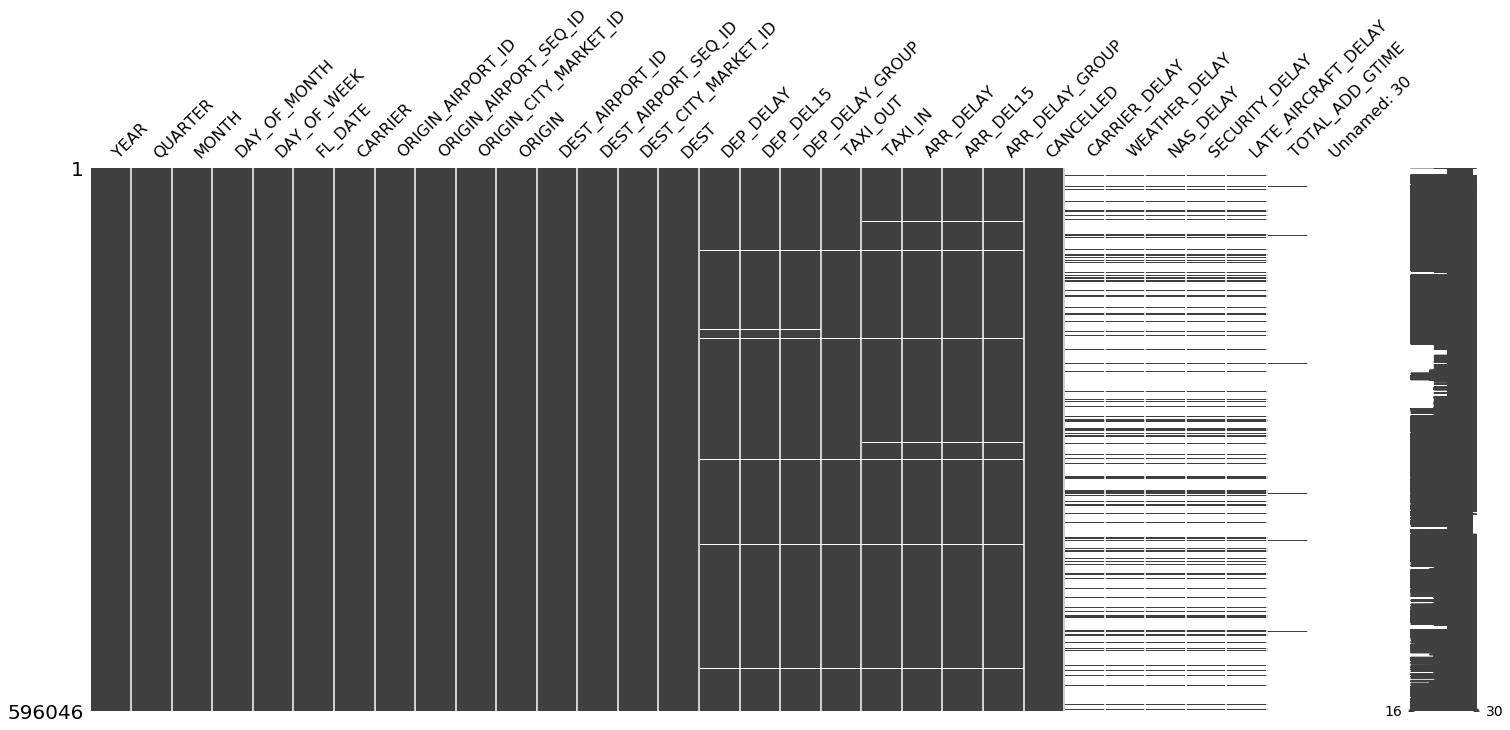

In [6]:
msno.matrix(df)

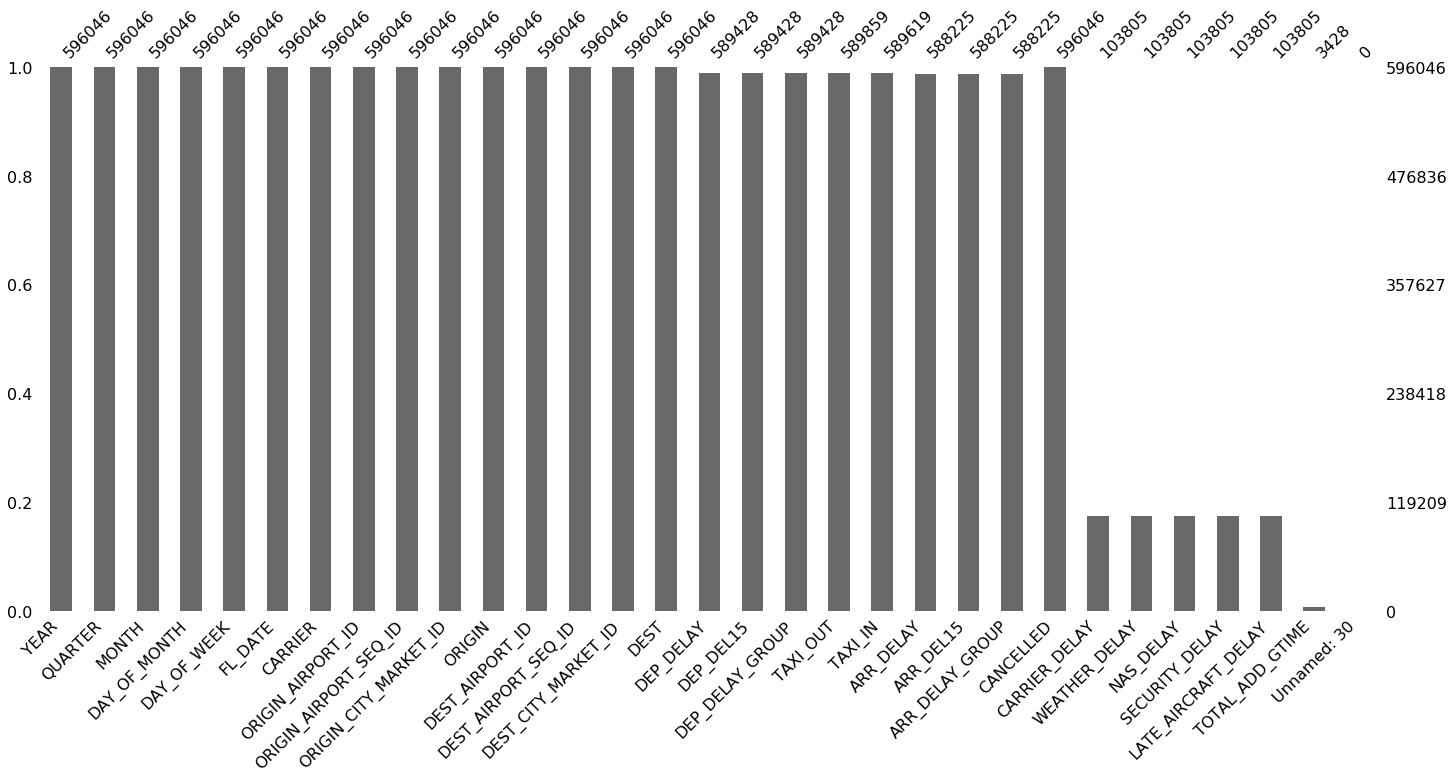

In [7]:
msno.bar(df)

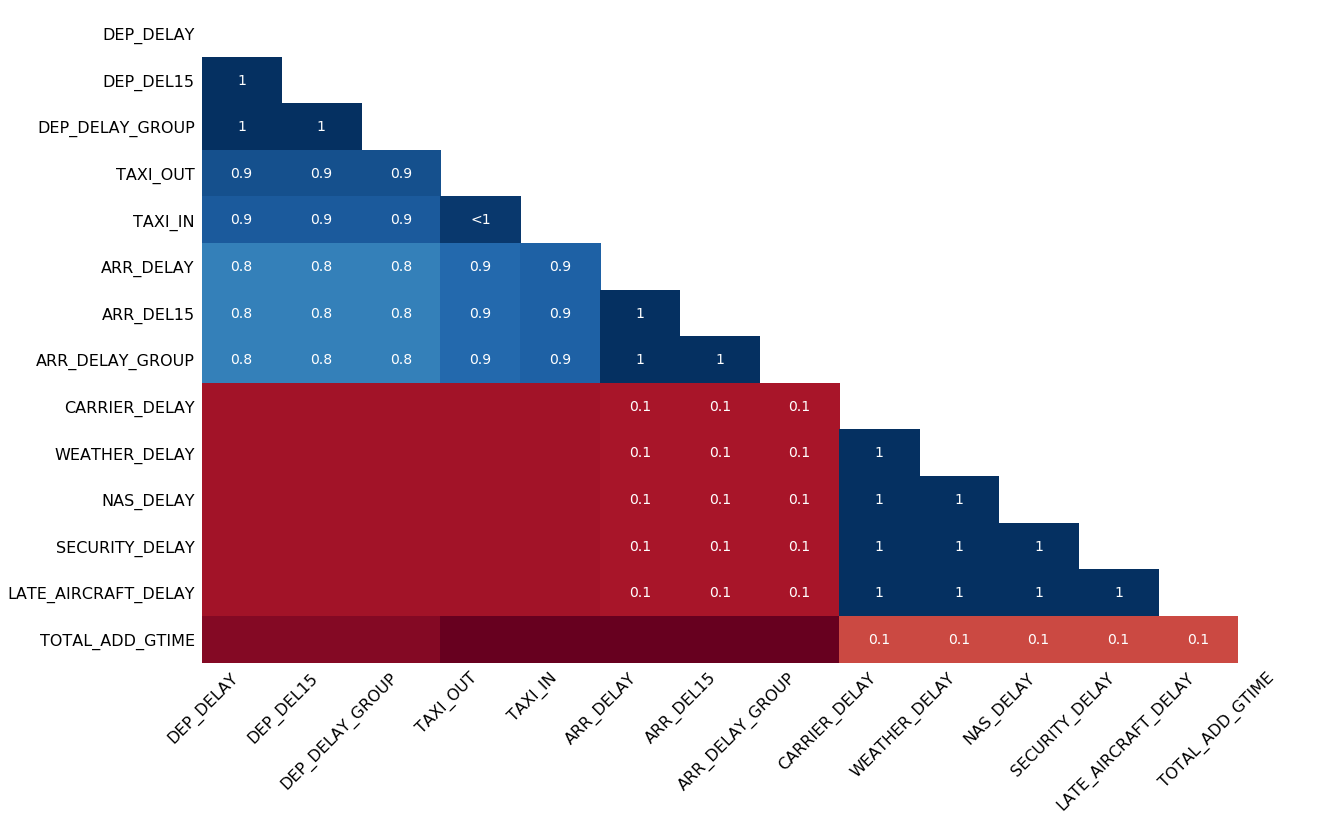

In [8]:
msno.heatmap(df)

In [9]:
df.drop(['Unnamed: 30'],axis=1,inplace=True)

In [10]:
df.drop(['ORIGIN_AIRPORT_SEQ_ID','ORIGIN_CITY_MARKET_ID','DEST_AIRPORT_SEQ_ID','DEST_CITY_MARKET_ID'],axis=1,inplace=True)

In [11]:
c=df.columns[df.columns.slice_indexer('YEAR','CANCELLED')]

In [12]:
c

Index([u'YEAR', u'QUARTER', u'MONTH', u'DAY_OF_MONTH', u'DAY_OF_WEEK',
       u'FL_DATE', u'CARRIER', u'ORIGIN_AIRPORT_ID', u'ORIGIN',
       u'DEST_AIRPORT_ID', u'DEST', u'DEP_DELAY', u'DEP_DEL15',
       u'DEP_DELAY_GROUP', u'TAXI_OUT', u'TAXI_IN', u'ARR_DELAY', u'ARR_DEL15',
       u'ARR_DELAY_GROUP', u'CANCELLED'],
      dtype='object')

In [13]:
df=df.dropna(subset=c,how='any')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587626 entries, 72 to 596045
Data columns (total 26 columns):
YEAR                   587626 non-null int64
QUARTER                587626 non-null int64
MONTH                  587626 non-null int64
DAY_OF_MONTH           587626 non-null int64
DAY_OF_WEEK            587626 non-null int64
FL_DATE                587626 non-null object
CARRIER                587626 non-null object
ORIGIN_AIRPORT_ID      587626 non-null int64
ORIGIN                 587626 non-null object
DEST_AIRPORT_ID        587626 non-null int64
DEST                   587626 non-null object
DEP_DELAY              587626 non-null float64
DEP_DEL15              587626 non-null float64
DEP_DELAY_GROUP        587626 non-null float64
TAXI_OUT               587626 non-null float64
TAXI_IN                587626 non-null float64
ARR_DELAY              587626 non-null float64
ARR_DEL15              587626 non-null float64
ARR_DELAY_GROUP        587626 non-null float64
CANCELLED    

In [15]:
df.iloc[:10,5:23]

,FL_DATE,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_DELAY,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,TAXI_IN,ARR_DELAY,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY
72,2018-04-10,YV,11057,CLT,12266,IAH,-1.0,0.0,-1.0,31.0,4.0,18.0,1.0,1.0,0.0,0.0,0.0,18.0
73,2018-04-02,YV,15016,STL,12266,IAH,0.0,0.0,0.0,62.0,6.0,28.0,1.0,1.0,0.0,0.0,0.0,28.0
74,2018-04-10,YV,12266,IAH,13871,OMA,-10.0,0.0,-1.0,56.0,5.0,37.0,1.0,2.0,0.0,0.0,0.0,37.0
75,2018-04-13,YV,12266,IAH,11193,CVG,-6.0,0.0,-1.0,39.0,44.0,32.0,1.0,2.0,0.0,0.0,0.0,32.0
76,2018-04-21,YV,12266,IAH,14683,SAT,-1.0,0.0,-1.0,86.0,4.0,68.0,1.0,4.0,0.0,0.0,0.0,68.0
77,2018-04-22,YV,14683,SAT,12266,IAH,-2.0,0.0,-1.0,45.0,7.0,35.0,1.0,2.0,0.0,0.0,0.0,35.0
78,2018-04-22,YV,14683,SAT,12266,IAH,-5.0,0.0,-1.0,35.0,8.0,27.0,1.0,1.0,0.0,0.0,0.0,27.0
79,2018-04-27,YV,12266,IAH,14683,SAT,0.0,0.0,0.0,39.0,3.0,15.0,1.0,1.0,0.0,0.0,0.0,15.0
80,2018-04-10,YV,12266,IAH,15016,STL,-2.0,0.0,-1.0,22.0,8.0,15.0,1.0,1.0,0.0,0.0,0.0,15.0
81,2018-04-03,YV,13198,MCI,12266,IAH,-5.0,0.0,-1.0,9.0,5.0,37.0,1.0,2.0,0.0,0.0,0.0,37.0


In [16]:
df_nocancel = df[df.CANCELLED != 1.0]

In [17]:
df_nocancel.drop(['CANCELLED'],axis=1,inplace=True)

In [18]:
df_nocancel.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,...,TAXI_IN,ARR_DELAY,ARR_DEL15,ARR_DELAY_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TOTAL_ADD_GTIME
72,2018,2,4,10,2,2018-04-10,YV,11057,CLT,12266,...,4.0,18.0,1.0,1.0,0.0,0.0,18.0,0.0,0.0,NaN
73,2018,2,4,2,1,2018-04-02,YV,15016,STL,12266,...,6.0,28.0,1.0,1.0,0.0,0.0,28.0,0.0,0.0,NaN
74,2018,2,4,10,2,2018-04-10,YV,12266,IAH,13871,...,5.0,37.0,1.0,2.0,0.0,0.0,37.0,0.0,0.0,NaN
75,2018,2,4,13,5,2018-04-13,YV,12266,IAH,11193,...,44.0,32.0,1.0,2.0,0.0,0.0,32.0,0.0,0.0,NaN
76,2018,2,4,21,6,2018-04-21,YV,12266,IAH,14683,...,4.0,68.0,1.0,4.0,0.0,0.0,68.0,0.0,0.0,NaN


In [19]:
df_nocancel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587626 entries, 72 to 596045
Data columns (total 25 columns):
YEAR                   587626 non-null int64
QUARTER                587626 non-null int64
MONTH                  587626 non-null int64
DAY_OF_MONTH           587626 non-null int64
DAY_OF_WEEK            587626 non-null int64
FL_DATE                587626 non-null object
CARRIER                587626 non-null object
ORIGIN_AIRPORT_ID      587626 non-null int64
ORIGIN                 587626 non-null object
DEST_AIRPORT_ID        587626 non-null int64
DEST                   587626 non-null object
DEP_DELAY              587626 non-null float64
DEP_DEL15              587626 non-null float64
DEP_DELAY_GROUP        587626 non-null float64
TAXI_OUT               587626 non-null float64
TAXI_IN                587626 non-null float64
ARR_DELAY              587626 non-null float64
ARR_DEL15              587626 non-null float64
ARR_DELAY_GROUP        587626 non-null float64
CARRIER_DELAY

In [20]:
data = df_nocancel.iloc[:,:19]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587626 entries, 72 to 596045
Data columns (total 19 columns):
YEAR                 587626 non-null int64
QUARTER              587626 non-null int64
MONTH                587626 non-null int64
DAY_OF_MONTH         587626 non-null int64
DAY_OF_WEEK          587626 non-null int64
FL_DATE              587626 non-null object
CARRIER              587626 non-null object
ORIGIN_AIRPORT_ID    587626 non-null int64
ORIGIN               587626 non-null object
DEST_AIRPORT_ID      587626 non-null int64
DEST                 587626 non-null object
DEP_DELAY            587626 non-null float64
DEP_DEL15            587626 non-null float64
DEP_DELAY_GROUP      587626 non-null float64
TAXI_OUT             587626 non-null float64
TAXI_IN              587626 non-null float64
ARR_DELAY            587626 non-null float64
ARR_DEL15            587626 non-null float64
ARR_DELAY_GROUP      587626 non-null float64
dtypes: float64(8), int64(7), object(4)
memory usag

#### Tests of variation and covariation

In [26]:
corr=data.corr()

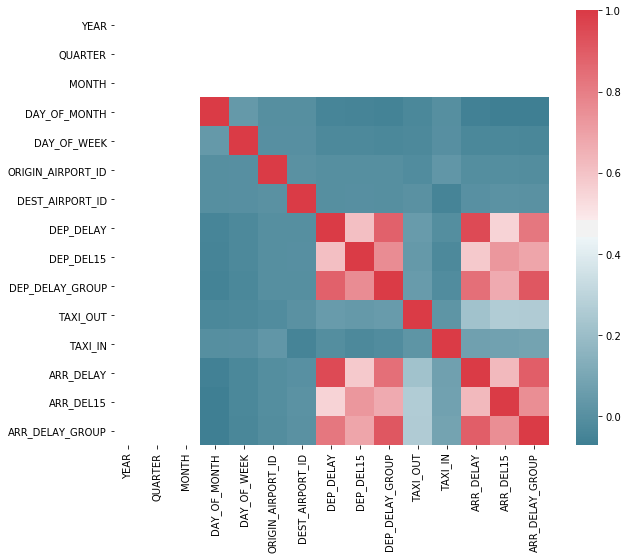

In [27]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

#### Nothing really standing out here. The lack of correlation between day of month or day of week and delays is a little interesting - I would have expected more of a correlation. Next step would be to look at datasets from different months and compare.

#### Furthermore, should finish cleaning up this dataset. Check for outliers, examine categorical variables, one-hot encoding, etc.

In [ ]:
sns.pairplot(data,diag_kind="kde")

LinAlgError: singular matrix